loud the data

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import statsmodels.api as sm

from random import*
from google.colab import drive
from scipy.stats import multivariate_normal
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, KFold,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder


# Step 2: Mount Google Drive
drive.mount('/content/drive')
# Step 4: Read the CSV file into a DataFrame
Xy_train = pd.read_csv("/content/drive/Shareddrives/ML/חלק ב/AirlineSatisfaction Dataset/Xy_train.csv")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Pre-Processing

In [51]:
train_data = Xy_train
# Remove unwanted class
train_data["Class"][train_data["Class"] == "IT IS SO BORING WORKING IN AN AIRPORT'S DESK OH MY GODDDDD"] = None
train_data["Class"][train_data["Class"] == 'Unknown'] = None

for column in train_data[:-1].columns:train_data[column] = train_data[column].fillna(np.random.choice(train_data[column][~train_data[column].isna()]))

# Encode categorical variables
categorical_columns = train_data.select_dtypes(include=['object', 'category']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    train_data[column] = le.fit_transform(train_data[column])
    print(train_data[column])
    label_encoders[column] = le

print('______________________________________________________________________________________________________________________-')
for column in train_data.columns: print(f"column : {column} -> {list(train_data[column].unique())}")

<ipython-input-51-714a75056065>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Class"][train_data["Class"] == "IT IS SO BORING WORKING IN AN AIRPORT'S DESK OH MY GODDDDD"] = None
<ipython-input-51-714a75056065>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Class"][train_data["Class"] == 'Unknown'] = None


0       0
1       0
2       1
3       1
4       1
       ..
8995    0
8996    1
8997    1
8998    0
8999    0
Name: Gender, Length: 9000, dtype: int64
0       0
1       0
2       1
3       1
4       0
       ..
8995    0
8996    0
8997    0
8998    0
8999    0
Name: Customer Type, Length: 9000, dtype: int64
0       1
1       0
2       0
3       0
4       1
       ..
8995    0
8996    0
8997    1
8998    0
8999    0
Name: Type of Travel, Length: 9000, dtype: int64
0       1
1       1
2       1
3       1
4       1
       ..
8995    0
8996    0
8997    1
8998    2
8999    0
Name: Class, Length: 9000, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
8995    1
8996    1
8997    0
8998    1
8999    0
Name: satisfaction, Length: 9000, dtype: int64
______________________________________________________________________________________________________________________-
column : Gender -> [0, 1]
column : Customer Type -> [0, 1]
column : Age -> [35.0, 43.0, 21.0, 39.0, 17.0,

creat tree

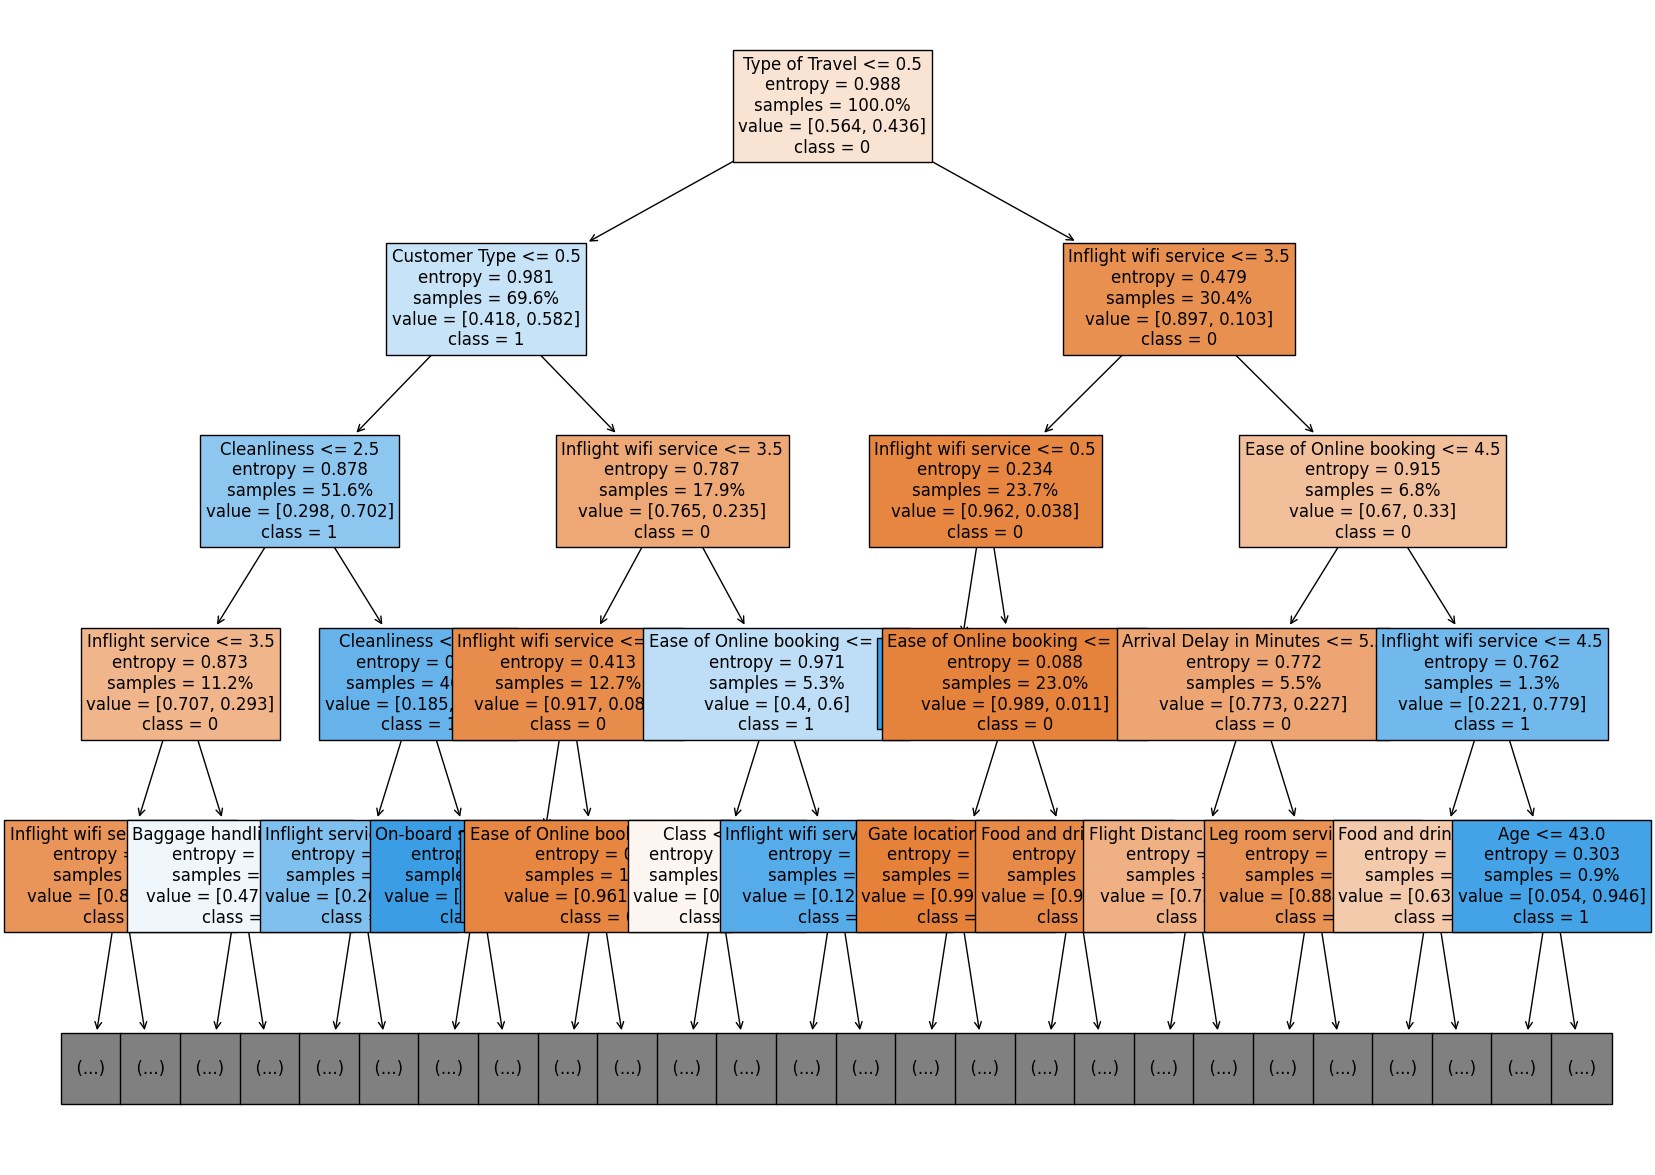

test_f1_accuracy:  0.9029535864978904 ,  train_f1_accuracy:  0.9028842134596627
[[0.93464052 0.06535948]
 [0.10833333 0.89166667]]


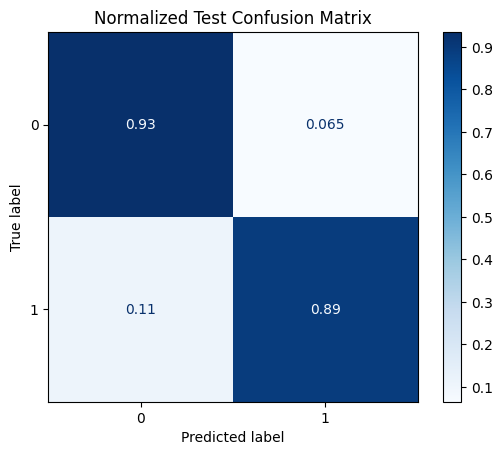

[[0.92020815 0.07979185]
 [0.09218268 0.90781732]]


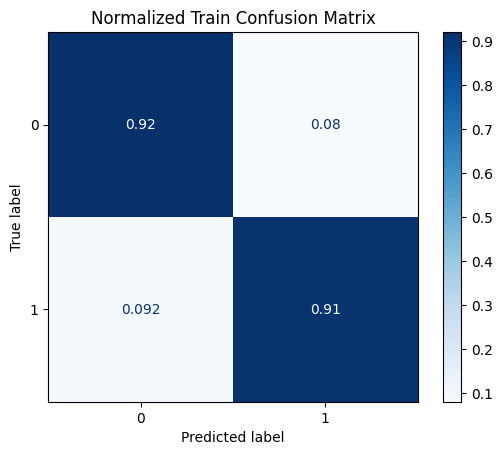

In [52]:

# Split the data
y_train = train_data['satisfaction']
X_train = train_data.drop(columns=['satisfaction'])
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_train, y_train, test_size=1/11, random_state=42) #החלפתי את הגודל של הטסט ל-0.1 כדי שיתאים לדרישות של הפיתול של עד אלף רשומות למבחן

# Train the decision tree



model = DecisionTreeClassifier(criterion='entropy', random_state=42 , ccp_alpha = 0.0, class_weight = None, max_depth = 10, max_features = None, max_leaf_nodes = None, min_impurity_decrease =  0.0,  min_samples_leaf  = 11 , min_samples_split =  2,  min_weight_fraction_leaf = 0.0 ,splitter =  'best')
tree = model.fit(X_train_, y_train_)

# Evaluate the model
test_f1_accuracy = f1_score(y_test_, model.predict(X_test_))
train_f1_accuracy = f1_score(y_train_, model.predict(X_train_))

# Plot the decision tree
plt.figure(figsize=(20, 15))
plot_tree(model, filled=True, max_depth=4, class_names=['0', '1'], feature_names=X_train.columns, fontsize=12, proportion=True)
plt.show()

print('test_f1_accuracy: ', test_f1_accuracy, ',  train_f1_accuracy: ', train_f1_accuracy)



# Print test confusion matrix with normalization
cm_test = confusion_matrix(y_test_, model.predict(X_test_), normalize='true')
print(cm_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Normalized Test Confusion Matrix')
plt.show()

# Print train confusion matrix with normalization
cm_train = confusion_matrix(y_train_, model.predict(X_train_), normalize='true')
print(cm_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Normalized Train Confusion Matrix')
plt.show()



    'max_depth': np.arange(4, 40, 10),
    'min_samples_split': np.arange(2, 10, 2),
    'min_samples_leaf': np.arange(2, 10, 2),
    'criterion': ['entropy', 'gini'],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'min_impurity_decrease': [0.0, 0.01, 0.05]}

sample_index row in the tree

In [53]:
sample_index = 19
row_ = X_test_.iloc[[sample_index]]
decision_path = model.decision_path(row_)[0]
node_indicator = model.decision_path(row_ )
node_index = node_indicator.indices[node_indicator.indptr[0]:node_indicator.indptr[1]]
# print(f"Decision path for sample {X_train_.iloc[[sample_index]]}:")
path = " root \n "
print(f'row : {list(row_.Age.keys())[0]}')

for node_id in node_index:
    if model.tree_.feature[node_id] != -2:
      feature_name = X_train_.columns[model.tree_.feature[node_id]]
      feature_value = row_[feature_name].values[0]
      path += f" -> {feature_name} , threshold: {feature_value} =< {model.tree_.threshold[node_id]}  \n "
    else:
        path += f"->  Leaf node "
print(path, 'prediction:', model.predict(row_)[0], "True result:", y_test_.iloc[sample_index])

row : 6377
 root 
  -> Type of Travel , threshold: 0 =< 0.5  
  -> Customer Type , threshold: 1 =< 0.5  
  -> Inflight wifi service , threshold: 4.0 =< 3.5  
  -> Ease of Online booking , threshold: 4.0 =< 4.5  
  -> Class , threshold: 1 =< 0.5  
  -> Class , threshold: 1 =< 1.5  
  -> On-board service , threshold: 5.0 =< 2.5  
  -> Age , threshold: 40.0 =< 28.5  
  -> Age , threshold: 40.0 =< 37.5  
  -> Flight Distance , threshold: 990.0 =< 740.5  
 ->  Leaf node  prediction: 1 True result: 1


feature importances

In [54]:
df_fea = pd.DataFrame()
df_fea["feature"] = X_train_.columns
df_fea["importances"] = model.feature_importances_
print(df_fea.sort_values(by="importances", ascending=False))


                              feature  importances
3                      Type of Travel     0.222525
7               Inflight wifi service     0.212598
18                        Cleanliness     0.162167
1                       Customer Type     0.121671
17                   Inflight service     0.073792
9              Ease of Online booking     0.034970
15                   Baggage handling     0.027327
13                   On-board service     0.027073
12                       Seat comfort     0.023002
16                    Checkin service     0.018593
5                     Flight Distance     0.016870
2                                 Age     0.014164
20           Arrival Delay in Minutes     0.008922
11                     Food and drink     0.008489
4                               Class     0.007604
8   Departure/Arrival time convenient     0.005540
10                      Gate location     0.005197
14                   Leg room service     0.004715
0                              

graph f1_score by max_depth

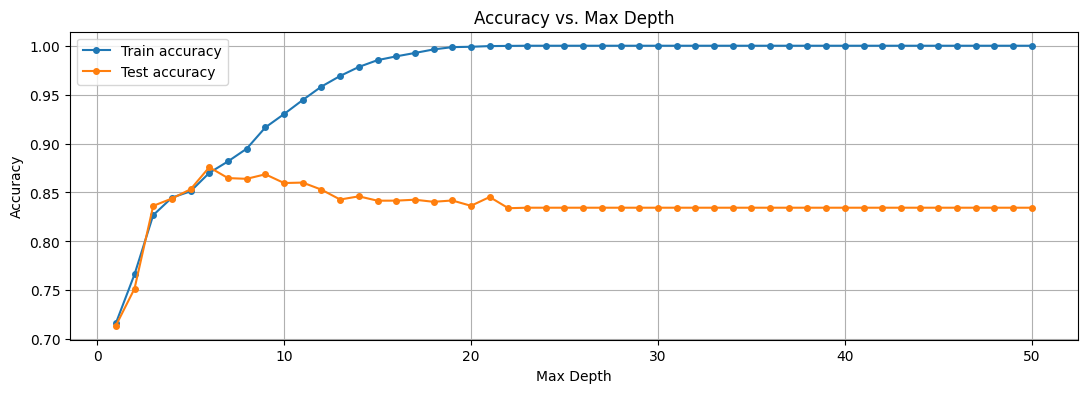

In [59]:
# Prepare for hyperparameter tuning
max_depth_list = np.arange(1, 51, 1)
results = []

# Split the data
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_train, y_train, test_size=0.3, random_state=123)

# Tune max_depth
for max_depth in max_depth_list:
    model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
    model.fit(X_train_, y_train_)
    train_acc = f1_score(y_train_, model.predict(X_train_))
    test_acc = f1_score(y_test_, model.predict(X_test_))
    results.append({'max_depth': max_depth, 'train_acc': train_acc, 'test_acc': test_acc})

# Convert results to DataFrame
res = pd.DataFrame(results)

# Plot the results
plt.figure(figsize=(13, 4))
plt.plot(res['max_depth'], res['train_acc'], marker='o', markersize=4)
plt.plot(res['max_depth'], res['test_acc'], marker='o', markersize=4)
plt.legend(['Train accuracy', 'Test accuracy'])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Max Depth')
plt.grid(True)
plt.show()

graph f1_score by min_samples_leaf

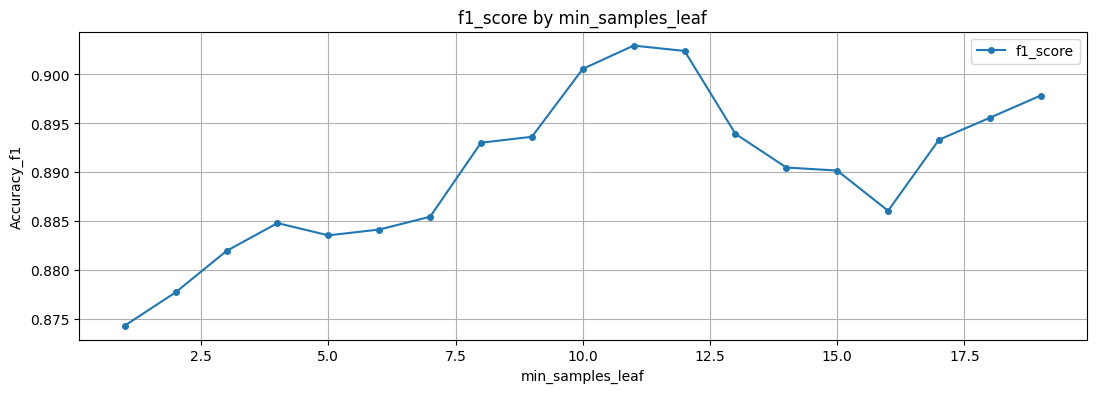

In [56]:
test_f1_accuracy = {}
for min_samples_leaf in np.arange(1,20,1):
  model = DecisionTreeClassifier(criterion='entropy', random_state=42 , ccp_alpha = 0.0, class_weight = None, max_depth = 10, max_features = None, max_leaf_nodes = None, min_impurity_decrease =  0.0,  min_samples_leaf  = min_samples_leaf , min_samples_split =  2,  min_weight_fraction_leaf = 0.0 ,splitter =  'best')
  model.fit(X_train_, y_train_)

  # Evaluate the model
  test_f1_accuracy[min_samples_leaf] = f1_score(y_test_, model.predict(X_test_))

str_ = "min_samples_leaf"
# Plot the results
plt.figure(figsize=(13, 4))
plt.plot(test_f1_accuracy.keys(), test_f1_accuracy.values(), marker='o', markersize=4)
plt.legend(['f1_score', f'by {str_}'])
plt.xlabel(str_)
plt.ylabel(f'Accuracy_f1')
plt.title(f'f1_score by {str_}')
plt.grid(True)
plt.show()

graph f1_score by min_samples_leaf

ruff grid_search

In [57]:
#Ruff gridsearch
scoring = 'f1'

grid_search = {}
param_grid = {
  'max_depth': np.arange(4, 40, 10),
  'min_samples_split': np.arange(2, 10, 2),
  'min_samples_leaf': np.arange(2, 10, 2),
  'max_features': ['auto', 'sqrt', 'log2', None],
  'min_impurity_decrease': [0.0, 0.01, 0.05]}

for cv in [10]:

  kfold = KFold(n_splits=cv, shuffle=True, random_state=123, )
  grid_search[cv] = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42,criterion='entropy'),
                            param_grid=param_grid,
                            refit=True,
                            cv=kfold, verbose=1, scoring=scoring)

  grid_search[cv].fit(X_train, y_train)


Fitting 10 folds for each of 768 candidates, totalling 7680 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Delicant grid search

In [ ]:
#Delicant gridsearch

scoring = 'f1'

grid_search = {}
param_grid = {
    'max_depth': np.arange(8, 18, 1),
    'min_samples_split': np.arange(0, 4, 1),
    'min_samples_leaf': np.arange(6, 10, 1),
    #'max_features': ['auto', 'sqrt', 'log2', None],
    #'min_impurity_decrease': [0.0, 0.01, 0.05]
    }
for cv in [5,8,12,13]:

  kfold = KFold(n_splits=cv, shuffle=True, random_state=123)
  grid_search[cv] = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42,criterion='entropy',max_features=None),
                            param_grid=param_grid,
                            refit=True,
                            cv=kfold, verbose=1, scoring=scoring)

  grid_search[cv].fit(X_train, y_train)

grid search plots

k : 10 {'max_depth': 14, 'max_features': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 8, 'min_samples_split': 2} 

k : 10 f1 _score :  0.8603067542601612 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 14, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 8, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'} 



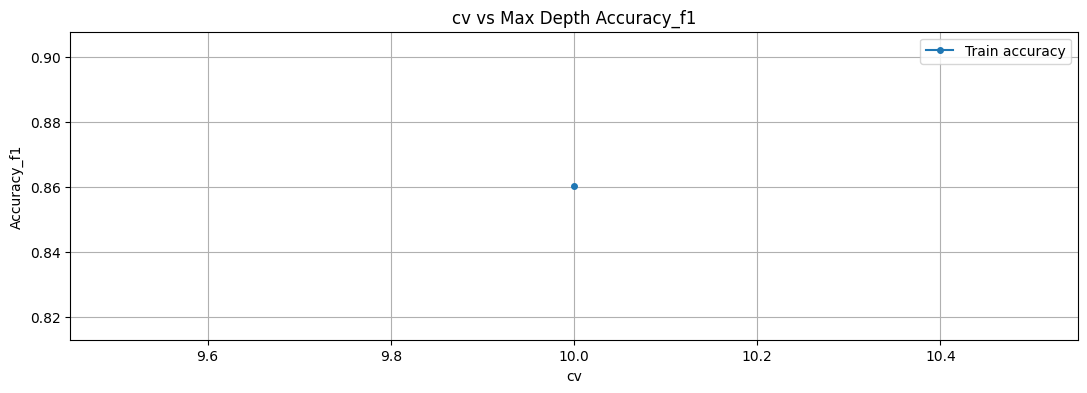

In [58]:
results=[]
for key , value in grid_search.items():
  best_model = value.best_estimator_
  print('k :' , key ,value.best_params_, '\n')
  print('k :' , key ,scoring, "_score : ",value.best_score_ ,best_model.get_params(), '\n')
  # pd.DataFrame(value.cv_results_)
  results.append({'cv': key,'test_acc': value.best_score_})

# Convert results to DataFrame
res = pd.DataFrame(results)

# Plot the results
plt.figure(figsize=(13, 4))
plt.plot(res['cv'], res['test_acc'], marker='o', markersize=4)
plt.legend(['Train accuracy', f'test_{scoring}'])
plt.xlabel('cv')
plt.ylabel(f'Accuracy_{scoring}')
plt.title(f'cv vs Max Depth Accuracy_{scoring}')
plt.grid(True)
plt.show()

**adding\\\\**

measure

In [60]:
model = DecisionTreeClassifier(random_state=42)
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

graph of Total Impurity vs effective alpha for training set

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

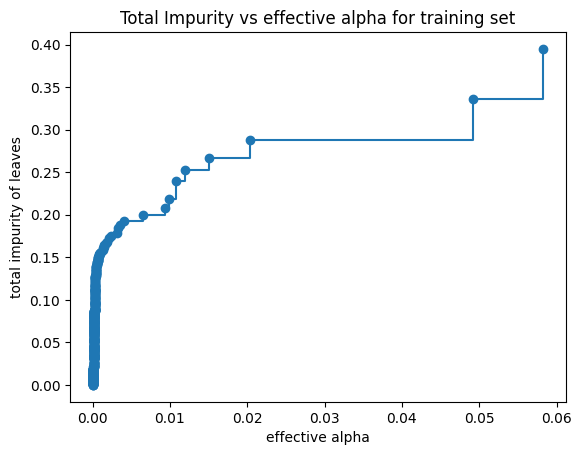

In [61]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

graph of Number of nodes vs alpha and Depth vs alpha

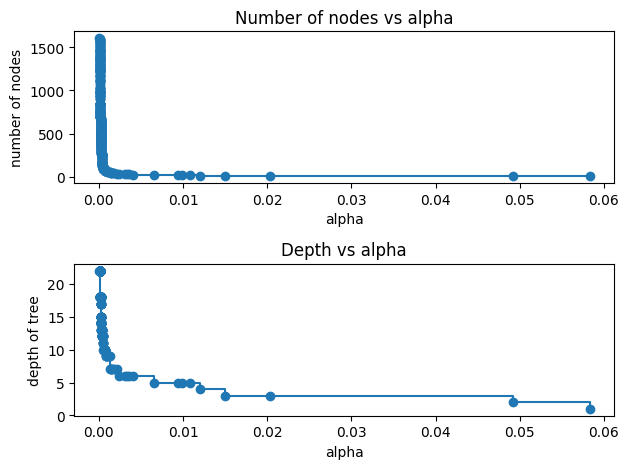

In [62]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
clfs_ = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs_]
depth = [clf.tree_.max_depth for clf in clfs_]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

graph of Accuracy vs alpha for training and testing sets

Length of ccp_alphas: 392
Length of train_scores: 392
Length of test_scores: 392


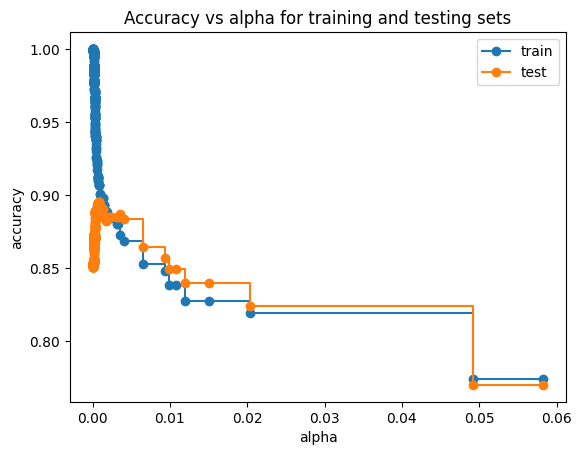

In [63]:

clfs_=[]
# Generate classifiers for each alpha
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
    clf.fit(X_train_, y_train_)
    clfs_.append(clf)

# Check lengths of lists
print(f"Length of ccp_alphas: {len(ccp_alphas)}")
print(f"Length of train_scores: {len(clfs_)}")
print(f"Length of test_scores: {len(clfs_)}")

train_scores = [clf.score(X_train_, y_train_) for clf in clfs_]
test_scores = [clf.score(X_test_, y_test_) for clf in clfs_]

# Plot
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()


final prediction to excel

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import statsmodels.api as sm

from random import*
from google.colab import drive
from scipy.stats import multivariate_normal
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV, KFold,RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

# Step 2: Mount Google Drive
drive.mount('/content/drive')

# Step 4: Read the CSV file into a DataFrame
train_data = pd.read_csv("/content/drive/Shareddrives/ML/חלק ב/AirlineSatisfaction Dataset/Xy_train.csv")
X_test = pd.read_csv("/content/drive/Shareddrives/ML/חלק ב/AirlineSatisfaction Dataset/X_test.csv")

# Remove unwanted class
train_data["Class"][train_data["Class"] == "IT IS SO BORING WORKING IN AN AIRPORT'S DESK OH MY GODDDDD"] = None
train_data["Class"][train_data["Class"] == 'Unknown'] = None
X_test["Class"][X_test["Class"] == 'Unknown'] = None

for column in train_data[:-1].columns:train_data[column] = train_data[column].fillna(np.random.choice(train_data[column][~train_data[column].isna()]))
for column in X_test[:-1].columns:X_test[column] = X_test[column].fillna(np.random.choice(X_test[column][~X_test[column].isna()]))

# Encode categorical variables
categorical_columns = train_data.select_dtypes(include=['object', 'category']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    train_data[column] = le.fit_transform(train_data[column])
    print(train_data[column])
    if column != 'satisfaction':
      label_encoders[column] = le

for column, label_encoder in label_encoders.items():
    X_test[column] = label_encoder.transform(X_test[column])

# Split the data
y_train = train_data['satisfaction']
X_train = train_data.drop(columns=['satisfaction'])

model = DecisionTreeClassifier(criterion='entropy', random_state=42 , ccp_alpha = 0.0, class_weight = None, max_depth = 10, max_features = None, max_leaf_nodes = None, min_impurity_decrease =  0.0,  min_samples_leaf  = 11 , min_samples_split =  2,  min_weight_fraction_leaf = 0.0 ,splitter =  'best')
tree = model.fit(X_train, y_train)

predicttion = model.predict(X_test)

# Plot the decision tree
plt.figure(figsize=(20, 15))
plot_tree(model, filled=True, max_depth=4, class_names=['0', '1'], feature_names=X_train.columns, fontsize=12, proportion=True)
plt.show()

print(predicttion)
df = pd.DataFrame()
df['target'] = predicttion
df.to_csv('/content/drive/Shareddrives/ML/חלק ב/airline_G17_ytest.xlsx', index=False)
print(df.shape,X_test.shape)
